### 1. Set Up the Pipeline Environment


#### Setting Up Kubeflow Environment on Local Machine using MicroKS8

### 2. Data loading & Pre-processing 

In [6]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the dataset
data = load_breast_cancer()

# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# View the first few rows of the dataset
print(df.head())
print(df.shape)


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [2]:
# Check for missing values
print(df.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [3]:
#Standardizing Features

from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Standardize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
#Splitting the Data

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


### 3. Feature Engineering

#### Feature engineering is the process of transforming raw data into meaningful features that better represent the underlying problem for the model. The aim is to enhance the model’s ability to make accurate predictions. In this case, we'll look at two types of feature engineering:

###### Polynomial Features: Creating interaction terms and polynomial terms from the original features.
##### Feature Selection: Selecting the most important features using techniques like correlation or feature importance.


### 1. Polynomial Features
#### Polynomial features involve raising existing features to higher powers and generating interaction terms between features. This can allow the model to learn more complex relationships between the input variables.

#### In this case, we will generate polynomial features up to degree 2 using PolynomialFeatures from scikit-learn.

In [7]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Print the shape of the transformed feature set
print(f"Original number of features: {X_train.shape[1]}")
print(f"Number of features after polynomial transformation: {X_train_poly.shape[1]}")

Original number of features: 30
Number of features after polynomial transformation: 495


### 2. Feature Selection
#### Adding polynomial features increases the dimensionality of the dataset, which can lead to overfitting. Therefore, feature selection can help reduce the number of input variables, improving the model's performance by removing irrelevant or redundant features.

#### Option 1: Correlation Analysis
#### You can remove features that are highly correlated with each other, as they may provide redundant information.

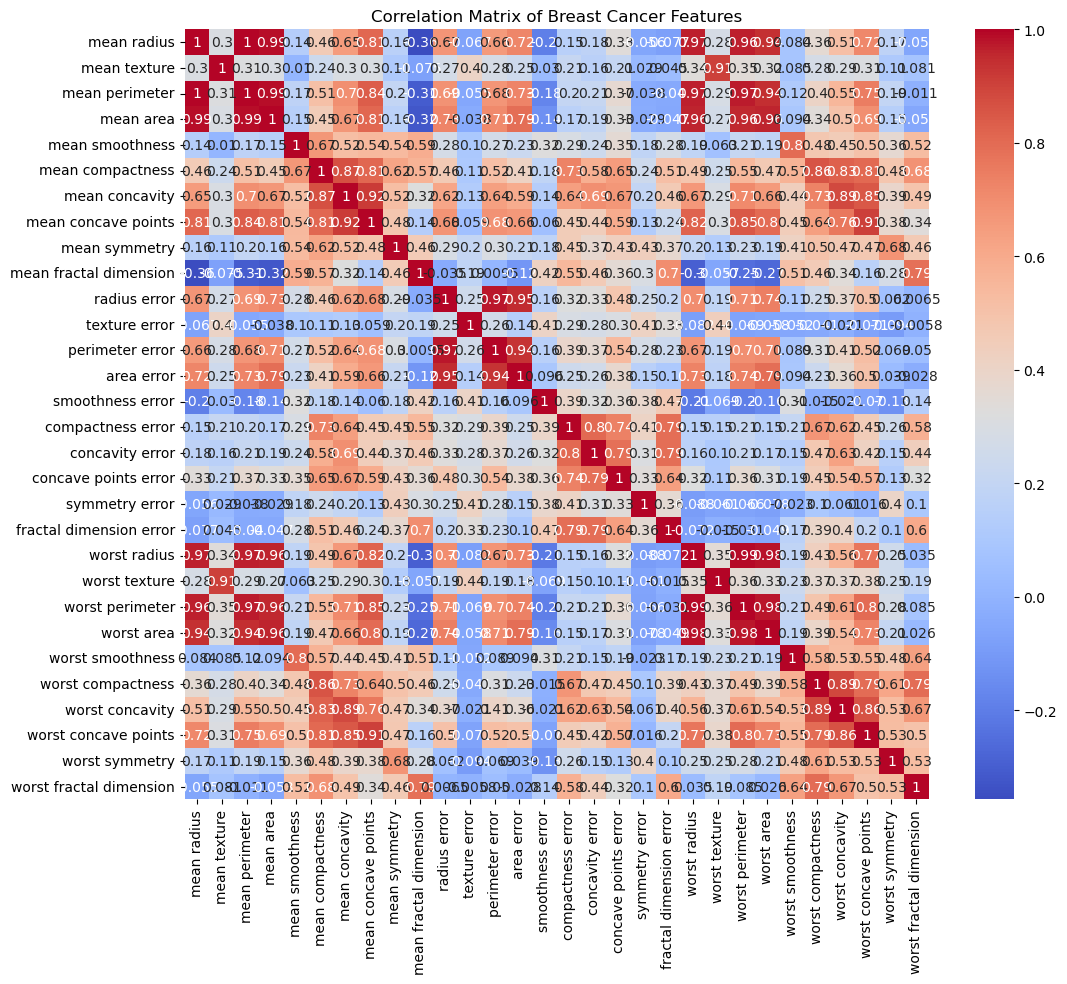

Number of features after correlation-based feature selection: 20


In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the scaled X_train back to a DataFrame for easier interpretation
X_train_df = pd.DataFrame(X_train, columns=data.feature_names)

# Calculate correlation matrix
corr_matrix = X_train_df.corr()

# Plot the heatmap for correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Breast Cancer Features")
plt.show()

# Threshold to remove highly correlated features
threshold = 0.90

# Select the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than the threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Drop correlated features
X_train_reduced = X_train_df.drop(to_drop, axis=1)
X_test_reduced = pd.DataFrame(X_test, columns=data.feature_names).drop(to_drop, axis=1)

print(f"Number of features after correlation-based feature selection: {X_train_reduced.shape[1]}")


#### Option 2: Feature Importance Using Random Forest
##### Random Forest models can give you a feature importance score that helps in selecting only the most relevant features.

In [14]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Fit a random forest model to compute feature importance
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Get feature importance and sort by it
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Select top features (e.g., top 10)
top_features = indices[:10]
X_train_top = X_train[:, top_features]
X_test_top = X_test[:, top_features]

print(f"Selected top features: {top_features}")

feature_names = data.feature_names  # or however you have stored them

# Select top N features
top_feature_names = [feature_names[i] for i in top_features]

# Print top features with their indices and names
print("Top Features:")
for idx, feature in zip(top_features, top_feature_names):
    print(f"Index: {idx}, Feature: {feature}, Importance: {importances[idx]:.4f}")

Selected top features: [ 7 27 23  6 20 22  2  3 26  0]
Top Features:
Index: 7, Feature: mean concave points, Importance: 0.1419
Index: 27, Feature: worst concave points, Importance: 0.1271
Index: 23, Feature: worst area, Importance: 0.1182
Index: 6, Feature: mean concavity, Importance: 0.0806
Index: 20, Feature: worst radius, Importance: 0.0780
Index: 22, Feature: worst perimeter, Importance: 0.0743
Index: 2, Feature: mean perimeter, Importance: 0.0601
Index: 3, Feature: mean area, Importance: 0.0538
Index: 26, Feature: worst concavity, Importance: 0.0411
Index: 0, Feature: mean radius, Importance: 0.0323


### 4. Model Training and Evaluation
##### In this step, we will train a machine learning model on the preprocessed and feature-engineered data, evaluate its performance, and log the results.

#### For this exercise, we will train several different models to predict whether a breast mass is malignant or benign, using common machine learning algorithms such as:

##### 1. Logistic Regression
##### 2. Random Forest
##### 3. Support Vector Machine (SVM)
##### We'll also evaluate the models using metrics like accuracy, precision, recall, and F1-score.

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize the models
logreg = LogisticRegression(max_iter=10000, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(kernel='linear', random_state=42)

# Train the models
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

#### Model Evaluation
##### We will evaluate the models on the test set using common classification metrics such as accuracy, precision, recall, and F1-score.

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate a model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
    return accuracy, precision, recall, f1

# Evaluate each model
print("Logistic Regression:")
evaluate_model(logreg, X_test, y_test)

print("\nRandom Forest:")
evaluate_model(rf, X_test, y_test)

print("\nSupport Vector Machine:")
evaluate_model(svm, X_test, y_test)

Logistic Regression:
Accuracy: 0.9825
Precision: 0.9907
Recall: 0.9815
F1-Score: 0.9860

Random Forest:
Accuracy: 0.9708
Precision: 0.9640
Recall: 0.9907
F1-Score: 0.9772

Support Vector Machine:
Accuracy: 0.9766
Precision: 0.9815
Recall: 0.9815
F1-Score: 0.9815


(0.9766081871345029,
 0.9814814814814815,
 0.9814814814814815,
 0.9814814814814815)

### 5. Cross-Validation of models
#### To further validate the model’s performance and reduce variance, we can use cross-validation. This method splits the training data into multiple folds and trains/evaluates the model on each fold.

In [17]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Logistic Regression
cv_scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')
print(f"Logistic Regression Cross-Validation Accuracy: {cv_scores.mean():.4f}")

# Cross-validation for Random Forest
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Random Forest Cross-Validation Accuracy: {cv_scores.mean():.4f}")

# Cross-validation for SVM
cv_scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')
print(f"SVM Cross-Validation Accuracy: {cv_scores.mean():.4f}")

Logistic Regression Cross-Validation Accuracy: 0.9748
Random Forest Cross-Validation Accuracy: 0.9497
SVM Cross-Validation Accuracy: 0.9748


### 6. Logging Model Performance
#### To keep track of the model's performance metrics, you can log them using MLflow, saving the results for comparison and future analysis.

In [26]:
import mlflow
import mlflow.sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Initialize models
logreg = LogisticRegression(max_iter=10000, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(kernel='linear', random_state=42)

# Define variables to store performance metrics
lr_accuracy, lr_precision, lr_recall, lr_f1 = 0, 0, 0, 0
rf_accuracy, rf_precision, rf_recall, rf_f1 = 0, 0, 0, 0
svm_accuracy, svm_precision, svm_recall, svm_f1 = 0, 0, 0, 0

# Define a function to log metrics
def log_metrics(model, model_name, X_train, y_train, X_test, y_test):
    with mlflow.start_run():
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict and evaluate
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        # Log parameters and metrics
        mlflow.log_param("model_name", model_name)
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)
        
        # Log the model
        mlflow.sklearn.log_model(model, "model")

        # Print results
        print(f"{model_name} Performance:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-Score: {f1:.4f}")
        
        return accuracy, precision, recall, f1

# Log metrics for Logistic Regression
lr_accuracy, lr_precision, lr_recall, lr_f1 = log_metrics(logreg, "Logistic Regression", X_train, y_train, X_test, y_test)

# Log metrics for Random Forest
rf_accuracy, rf_precision, rf_recall, rf_f1 = log_metrics(rf, "Random Forest", X_train, y_train, X_test, y_test)

# Log metrics for Support Vector Machine
svm_accuracy, svm_precision, svm_recall, svm_f1 = log_metrics(svm, "Support Vector Machine", X_train, y_train, X_test, y_test)

# Now you can compare metrics between models
print("\nModel Comparison:")
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Support Vector Machine Accuracy: {svm_accuracy:.4f}")

2024/09/10 17:05:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logistic Regression Performance:
Accuracy: 0.9825
Precision: 0.9907
Recall: 0.9815
F1-Score: 0.9860


2024/09/10 17:05:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Random Forest Performance:
Accuracy: 0.9708
Precision: 0.9640
Recall: 0.9907
F1-Score: 0.9772


2024/09/10 17:05:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Support Vector Machine Performance:
Accuracy: 0.9766
Precision: 0.9815
Recall: 0.9815
F1-Score: 0.9815

Model Comparison:
Logistic Regression Accuracy: 0.9825
Random Forest Accuracy: 0.9708
Support Vector Machine Accuracy: 0.9766


#### To view it, run "mlflow ui" and mlflow dashboard will run locally on the system. I have run it and screenshot is added in the folder. 

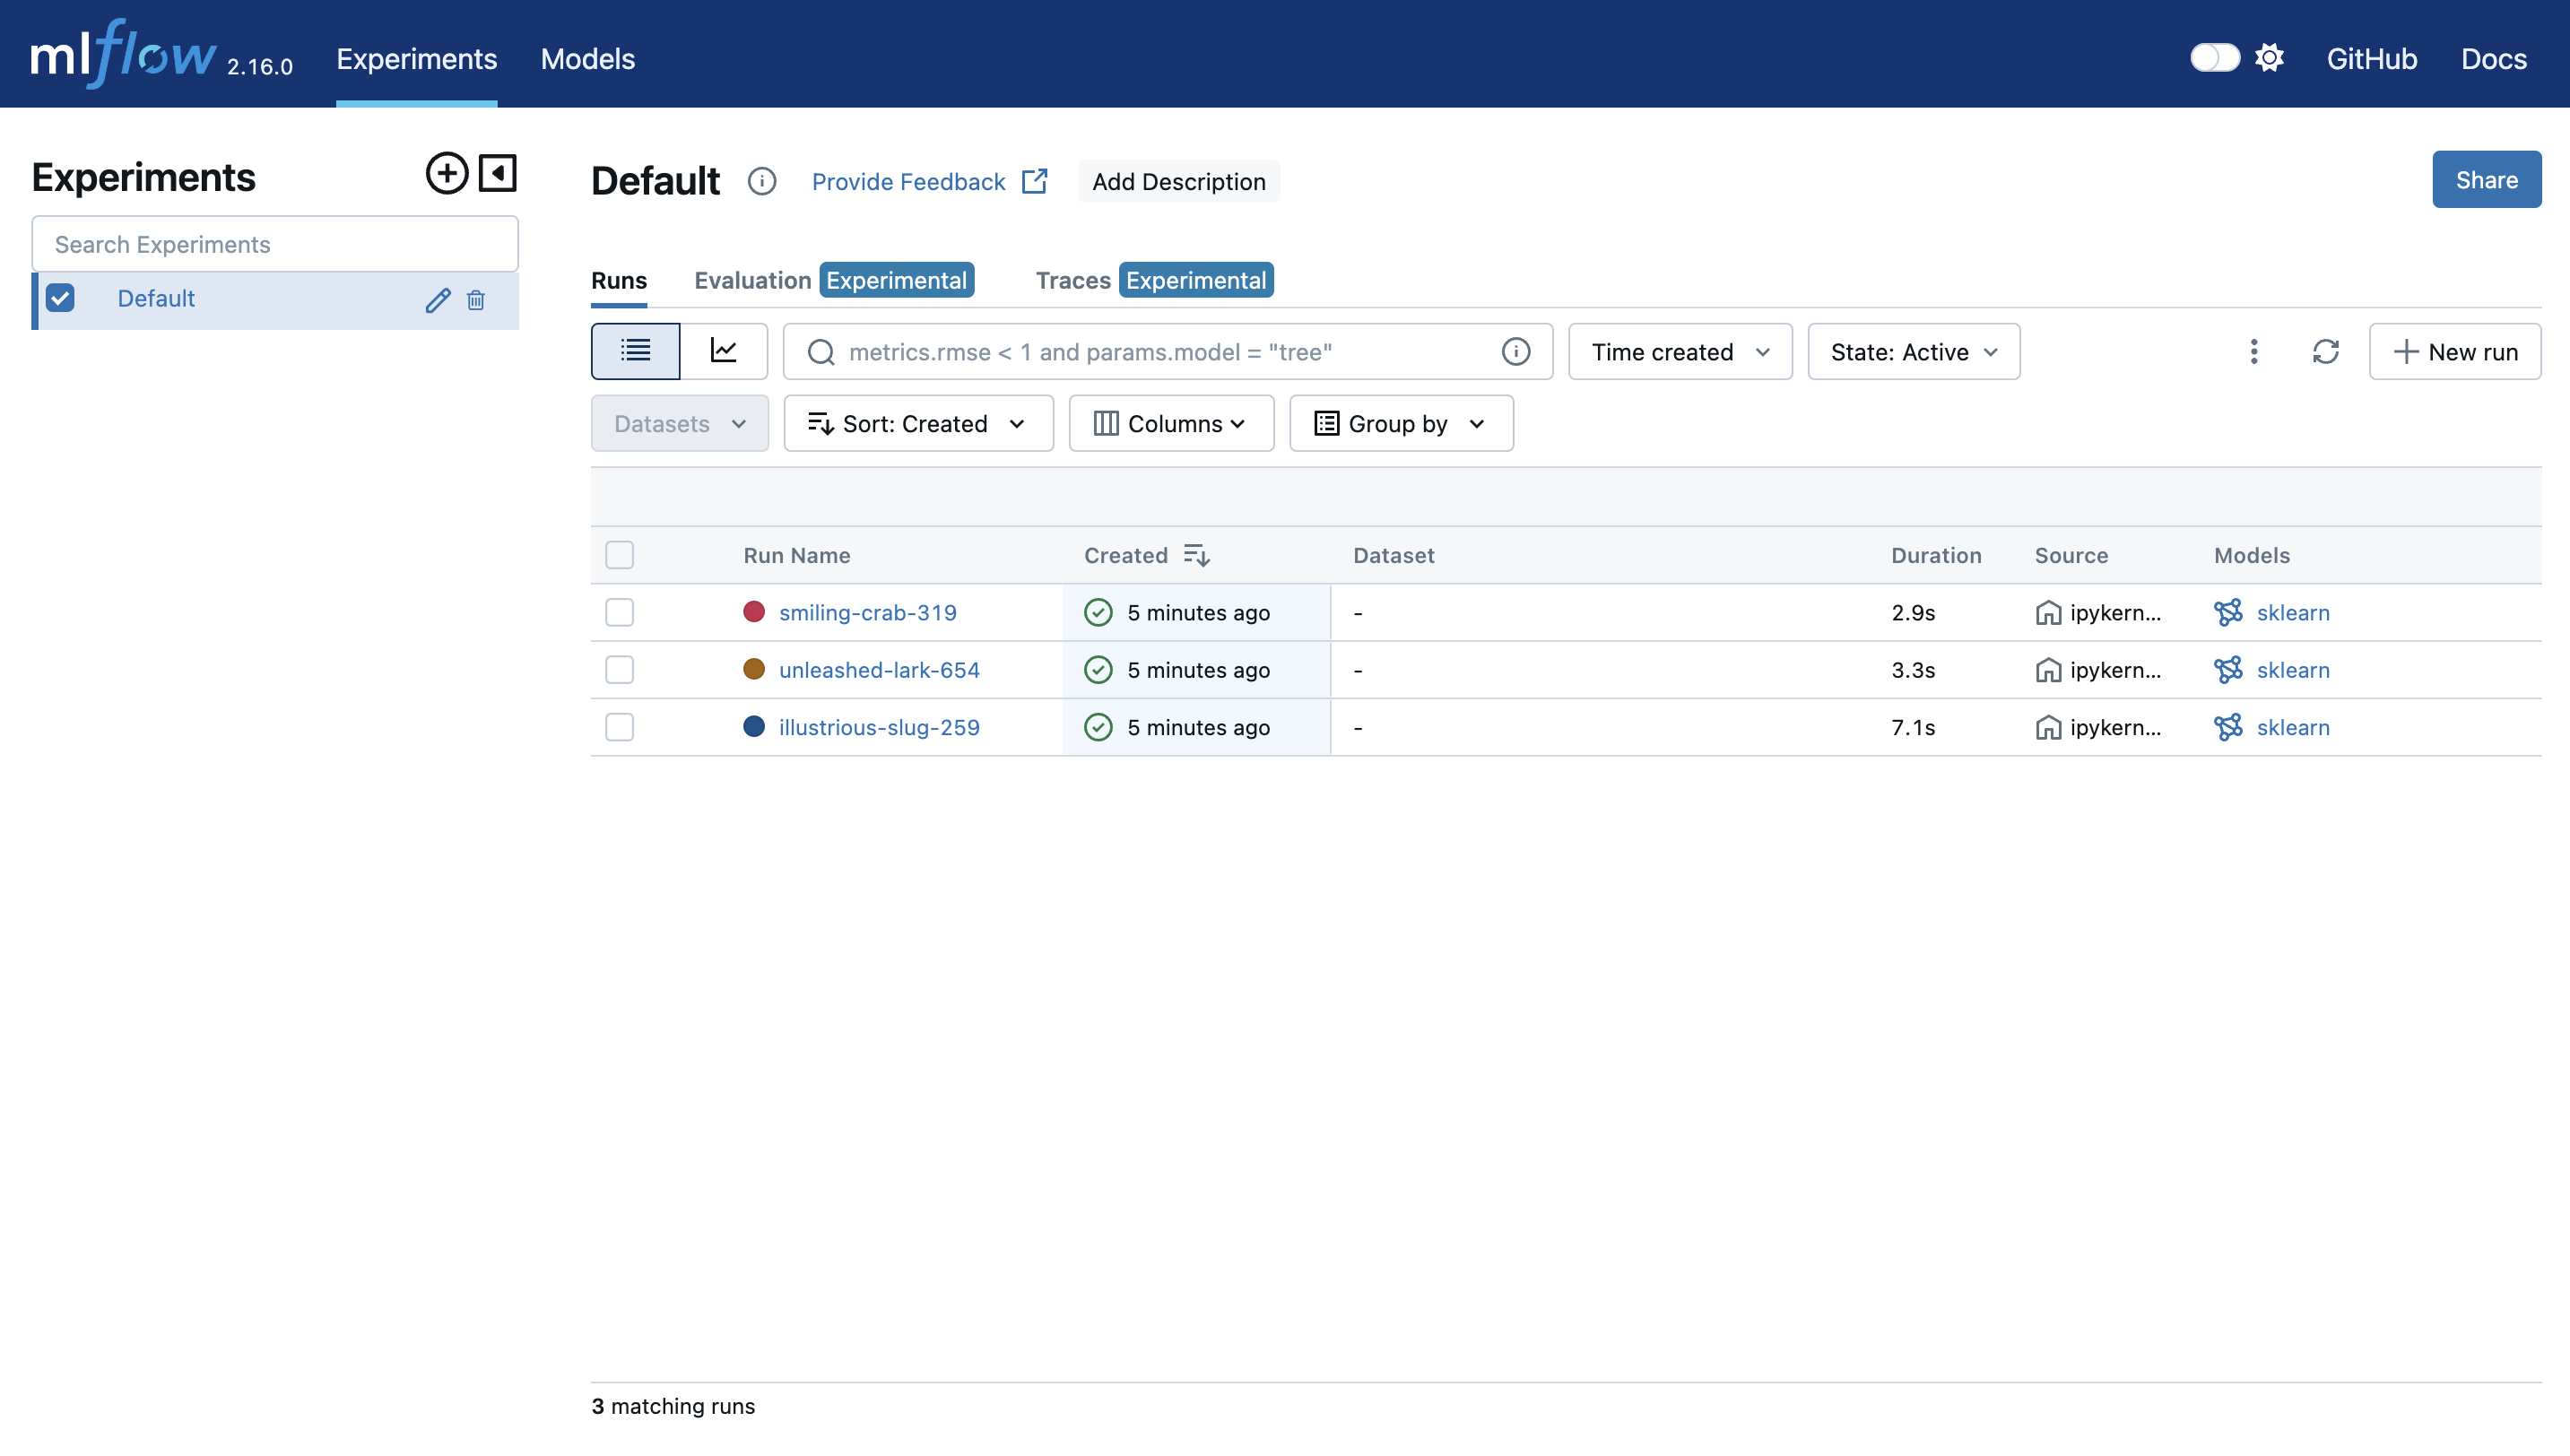

### 7. Save the best model as pickle file which is then to be used to create FastAPI

In [28]:
import joblib
import os

# Assuming you have accuracy or any other metric for each model
best_model = None

if rf_accuracy > lr_accuracy and rf_accuracy > svm_accuracy:
    best_model = rf
    print("Random Forest is the best model.")
elif lr_accuracy > rf_accuracy and lr_accuracy > svm_accuracy:
    best_model = logreg
    print("Logistic Regression is the best model.")
else:
    best_model = svm
    print("Support Vector Machine is the best model.")

os.makedirs("model", exist_ok=True)

# Save the best model
joblib.dump(best_model, "model/model.pkl")


Logistic Regression is the best model.


['model/model.pkl']

### 8. Model Deployment

##### 1. Create a Dockerfile

###### Dockerfile created in the folder

##### 2. Create a requirements.txt file 

##### with all the python required package to run the code

##### 3. Build and run dockerfile with the following commands: 

##### "docker build -t model-exercise3 ."
##### "docker run -p 8080:8080 model-exercise3"

#### 9. Create main.py file for running FastAPIs on POST method

#### API is succesfully running on "http://0.0.0.0:8080"

### Let's test the API here now!!

In [35]:
import requests

# Define the API endpoint
url = 'http://0.0.0.0:8080/predict'

# Define the data to send (features for prediction)
data = {
    "features": {
        "mean_radius": 14.1,
        "mean_texture": 22.3,
        "mean_perimeter": 91.4,
        "mean_area": 654.0,
        "mean_smoothness": 0.1,
        "mean_compactness": 0.2,
        "mean_concavity": 0.3,
        "mean_concave_points": 0.4,
        "mean_symmetry": 0.5,
        "mean_fractal_dimension": 0.6,
        "se_radius": 0.3,
        "se_texture": 0.4,
        "se_perimeter": 0.5,
        "se_area": 0.6,
        "se_smoothness": 0.1,
        "se_compactness": 0.2,
        "se_concavity": 0.3,
        "se_concave_points": 0.4,
        "se_symmetry": 0.5,
        "se_fractal_dimension": 0.6,
        "worst_radius": 16.5,
        "worst_texture": 25.3,
        "worst_perimeter": 105.4,
        "worst_area": 800.0,
        "worst_smoothness": 0.2,
        "worst_compactness": 0.3,
        "worst_concavity": 0.4,
        "worst_concave_points": 0.5,
        "worst_symmetry": 0.6,
        "worst_fractal_dimension": 0.7
    }
}

# Send a POST request
response = requests.post(url, json=data)

# Print the response (which contains the prediction)
print(response.json())

{'prediction': 'Benign'}


In [40]:
data1 = {
    "features": {
        "mean_radius": 80.2,
        "mean_texture": 22.3,
        "mean_perimeter": 91.4,
        "mean_area": 3000.0,
        "mean_smoothness": 0.1,
        "mean_compactness": 0.2,
        "mean_concavity": 0.3,
        "mean_concave_points": 0.4,
        "mean_symmetry": 0.5,
        "mean_fractal_dimension": 0.6,
        "se_radius": 0.3,
        "se_texture": 0.4,
        "se_perimeter": 0.5,
        "se_area": 0.6,
        "se_smoothness": 0.1,
        "se_compactness": 0.2,
        "se_concavity": 0.3,
        "se_concave_points": 0.4,
        "se_symmetry": 0.5,
        "se_fractal_dimension": 0.6,
        "worst_radius": 16.5,
        "worst_texture": 25.3,
        "worst_perimeter": 300.4,
        "worst_area": 5000.0,
        "worst_smoothness": 0.2,
        "worst_compactness": 0.3,
        "worst_concavity": 0.4,
        "worst_concave_points": 0.5,
        "worst_symmetry": 4.8,
        "worst_fractal_dimension": 0.7
    }
}

# Send a POST request
response = requests.post(url, json=data1)

# Print the response (which contains the prediction)
print(response.json())

{'prediction': 'Benign'}
